Importing The Dependencies

In [3]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

Data Import

In [52]:
df = pd.read_csv("/content/Train-1617360447408-1660719685476.csv")

Data Description

In [53]:
df.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [54]:
df.info

<bound method DataFrame.info of        index  encounter_id  patient_id             race  gender      age  \
0      69375     197029140    51521940         Hispanic    Male  [80-90)   
1      57272     163571946    92631357        Caucasian    Male  [60-70)   
2      82347     256497366    30023982        Caucasian  Female  [50-60)   
3      89608     289891212    93606021  AfricanAmerican  Female  [70-80)   
4      24091      81873900    23464296        Caucasian    Male  [70-80)   
...      ...           ...         ...              ...     ...      ...   
66582  39934     124202466    23450508        Caucasian  Female  [70-80)   
66583  47366     145667070    29324601        Caucasian    Male  [80-90)   
66584  76555     231061116     2179062        Caucasian  Female  [60-70)   
66585  25392      84911682    20531754                ?  Female  [80-90)   
66586  51312     153167502    81985473        Caucasian  Female  [80-90)   

      weight  time_in_hospital medical_specialty  num_l

In [55]:
df.dtypes

index                   int64
encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
weight                 object
time_in_hospital        int64
medical_specialty      object
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13       

In [56]:
df.describe()

,index,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,readmitted
count,66587.000000,6.658700e+04,6.658700e+04,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000
mean,50903.474282,1.653153e+08,5.422970e+07,4.397510,43.115533,1.331521,16.028744,0.365672,0.200460,0.637602,49.703387,7.424948,0.462012
std,29480.255515,1.030035e+08,3.878819e+07,2.980995,19.630417,1.705746,8.125304,1.221861,0.905503,1.255487,28.864879,1.933061,0.498559
min,0.000000,1.573800e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000283,1.000000,0.000000
25%,25166.500000,8.440328e+07,2.338646e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,24.622056,6.000000,0.000000
50%,51129.000000,1.528504e+08,4.526103e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,49.508499,8.000000,0.000000
75%,76380.000000,2.305049e+08,8.727185e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,74.637294,9.000000,1.000000
max,101765.000000,4.438672e+08,1.893494e+08,14.000000,129.000000,6.000000,81.000000,39.000000,63.000000,19.000000,99.995810,16.000000,1.000000


[Text(33.0, 0.5, 'Data Points'),
 Text(0.5, 14.09375, 'Columns'),
 Text(0.5, 1.0, 'Missing Data')]

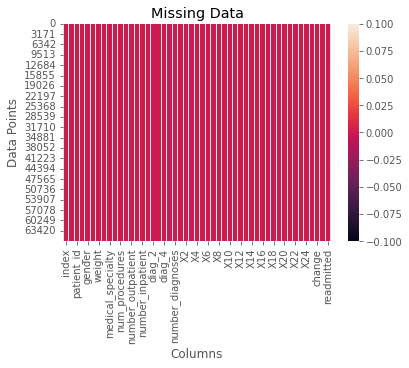

In [57]:
sns.heatmap(df.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points') #Missing Data Points

In [58]:
#names of all features
print(list(df))

['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age', 'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change', 'diabetesMed', 'readmitted']


Data Cleaning

Remove Duplicate Data Points

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

In [60]:
features_drop_list = ['weight', 'medical_specialty', 'X4', 'X5', 'X6', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X21', 'X22', 'X23', 'X24','X25', 'X8', 'X11']


In [61]:
df.drop(features_drop_list, axis=1,inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   time_in_hospital    66587 non-null  int64  
 7   num_lab_procedures  66587 non-null  int64  
 8   num_procedures      66587 non-null  int64  
 9   num_medications     66587 non-null  int64  
 10  number_outpatient   66587 non-null  int64  
 11  number_emergency    66587 non-null  int64  
 12  number_inpatient    66587 non-null  int64  
 13  diag_1              66587 non-null  object 
 14  diag_2              66587 non-null  object 
 15  diag_3              66587 non-null  object 
 16  diag

In [63]:
dl=['diag_4']

In [64]:
df.drop(dl, axis=1,inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   time_in_hospital    66587 non-null  int64  
 7   num_lab_procedures  66587 non-null  int64  
 8   num_procedures      66587 non-null  int64  
 9   num_medications     66587 non-null  int64  
 10  number_outpatient   66587 non-null  int64  
 11  number_emergency    66587 non-null  int64  
 12  number_inpatient    66587 non-null  int64  
 13  diag_1              66587 non-null  object 
 14  diag_2              66587 non-null  object 
 15  diag_3              66587 non-null  object 
 16  diag

In [66]:
#start by setting all values containing E or V into 0 (as one category)
df.loc[df['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
df.loc[df['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0

#setting all missing values into -1
df['diag_1'] = df['diag_1'].replace('?', -1)
df['diag_2'] = df['diag_2'].replace('?', -1)
df['diag_3'] = df['diag_3'].replace('?', -1)

#No all diag values can be converted into numeric values
df['diag_1'] = df['diag_1'].astype(float)
df['diag_2'] = df['diag_2'].astype(float)
df['diag_3'] = df['diag_3'].astype(float)

In [67]:
#Now we will reduce the number of categories in diag features according to ICD-9 code
#(Missing values will be grouped as E & V values)
df['diag_1'].loc[(df['diag_1']>=1) & (df['diag_1']< 140)] = 1
df['diag_1'].loc[(df['diag_1']>=140) & (df['diag_1']< 240)] = 2
df['diag_1'].loc[(df['diag_1']>=240) & (df['diag_1']< 280)] = 3
df['diag_1'].loc[(df['diag_1']>=280) & (df['diag_1']< 290)] = 4
df['diag_1'].loc[(df['diag_1']>=290) & (df['diag_1']< 320)] = 5
df['diag_1'].loc[(df['diag_1']>=320) & (df['diag_1']< 390)] = 6
df['diag_1'].loc[(df['diag_1']>=390) & (df['diag_1']< 460)] = 7
df['diag_1'].loc[(df['diag_1']>=460) & (df['diag_1']< 520)] = 8
df['diag_1'].loc[(df['diag_1']>=520) & (df['diag_1']< 580)] = 9
df['diag_1'].loc[(df['diag_1']>=580) & (df['diag_1']< 630)] = 10
df['diag_1'].loc[(df['diag_1']>=630) & (df['diag_1']< 680)] = 11
df['diag_1'].loc[(df['diag_1']>=680) & (df['diag_1']< 710)] = 12
df['diag_1'].loc[(df['diag_1']>=710) & (df['diag_1']< 740)] = 13
df['diag_1'].loc[(df['diag_1']>=740) & (df['diag_1']< 760)] = 14
df['diag_1'].loc[(df['diag_1']>=760) & (df['diag_1']< 780)] = 15
df['diag_1'].loc[(df['diag_1']>=780) & (df['diag_1']< 800)] = 16
df['diag_1'].loc[(df['diag_1']>=800) & (df['diag_1']< 1000)] = 17
df['diag_1'].loc[(df['diag_1']==-1)] = 0

df['diag_2'].loc[(df['diag_2']>=1) & (df['diag_2']< 140)] = 1
df['diag_2'].loc[(df['diag_2']>=140) & (df['diag_2']< 240)] = 2
df['diag_2'].loc[(df['diag_2']>=240) & (df['diag_2']< 280)] = 3
df['diag_2'].loc[(df['diag_2']>=280) & (df['diag_2']< 290)] = 4
df['diag_2'].loc[(df['diag_2']>=290) & (df['diag_2']< 320)] = 5
df['diag_2'].loc[(df['diag_2']>=320) & (df['diag_2']< 390)] = 6
df['diag_2'].loc[(df['diag_2']>=390) & (df['diag_2']< 460)] = 7
df['diag_2'].loc[(df['diag_2']>=460) & (df['diag_2']< 520)] = 8
df['diag_2'].loc[(df['diag_2']>=520) & (df['diag_2']< 580)] = 9
df['diag_2'].loc[(df['diag_2']>=580) & (df['diag_2']< 630)] = 10
df['diag_2'].loc[(df['diag_2']>=630) & (df['diag_2']< 680)] = 11
df['diag_2'].loc[(df['diag_2']>=680) & (df['diag_2']< 710)] = 12
df['diag_2'].loc[(df['diag_2']>=710) & (df['diag_2']< 740)] = 13
df['diag_2'].loc[(df['diag_2']>=740) & (df['diag_2']< 760)] = 14
df['diag_2'].loc[(df['diag_2']>=760) & (df['diag_2']< 780)] = 15
df['diag_2'].loc[(df['diag_2']>=780) & (df['diag_2']< 800)] = 16
df['diag_2'].loc[(df['diag_2']>=800) & (df['diag_2']< 1000)] = 17
df['diag_2'].loc[(df['diag_2']==-1)] = 0

df['diag_3'].loc[(df['diag_3']>=1) & (df['diag_3']< 140)] = 1
df['diag_3'].loc[(df['diag_3']>=140) & (df['diag_3']< 240)] = 2
df['diag_3'].loc[(df['diag_3']>=240) & (df['diag_3']< 280)] = 3
df['diag_3'].loc[(df['diag_3']>=280) & (df['diag_3']< 290)] = 4
df['diag_3'].loc[(df['diag_3']>=290) & (df['diag_3']< 320)] = 5
df['diag_3'].loc[(df['diag_3']>=320) & (df['diag_3']< 390)] = 6
df['diag_3'].loc[(df['diag_3']>=390) & (df['diag_3']< 460)] = 7
df['diag_3'].loc[(df['diag_3']>=460) & (df['diag_3']< 520)] = 8
df['diag_3'].loc[(df['diag_3']>=520) & (df['diag_3']< 580)] = 9
df['diag_3'].loc[(df['diag_3']>=580) & (df['diag_3']< 630)] = 10
df['diag_3'].loc[(df['diag_3']>=630) & (df['diag_3']< 680)] = 11
df['diag_3'].loc[(df['diag_3']>=680) & (df['diag_3']< 710)] = 12
df['diag_3'].loc[(df['diag_3']>=710) & (df['diag_3']< 740)] = 13
df['diag_3'].loc[(df['diag_3']>=740) & (df['diag_3']< 760)] = 14
df['diag_3'].loc[(df['diag_3']>=760) & (df['diag_3']< 780)] = 15
df['diag_3'].loc[(df['diag_3']>=780) & (df['diag_3']< 800)] = 16
df['diag_3'].loc[(df['diag_3']>=800) & (df['diag_3']< 1000)] = 17
df['diag_3'].loc[(df['diag_3']==-1)] = 0

df['diag_5'].loc[(df['diag_5']>=1) & (df['diag_5']< 140)] = 1
df['diag_5'].loc[(df['diag_5']>=140) & (df['diag_5']< 240)] = 2
df['diag_5'].loc[(df['diag_5']>=240) & (df['diag_5']< 280)] = 3
df['diag_5'].loc[(df['diag_5']>=280) & (df['diag_5']< 290)] = 4
df['diag_5'].loc[(df['diag_5']>=290) & (df['diag_5']< 320)] = 5
df['diag_5'].loc[(df['diag_5']>=320) & (df['diag_5']< 390)] = 6
df['diag_5'].loc[(df['diag_5']>=390) & (df['diag_5']< 460)] = 7
df['diag_5'].loc[(df['diag_5']>=460) & (df['diag_5']< 520)] = 8
df['diag_5'].loc[(df['diag_5']>=520) & (df['diag_5']< 580)] = 9
df['diag_5'].loc[(df['diag_5']>=580) & (df['diag_5']< 630)] = 10
df['diag_5'].loc[(df['diag_5']>=630) & (df['diag_5']< 680)] = 11
df['diag_5'].loc[(df['diag_5']>=680) & (df['diag_5']< 710)] = 12
df['diag_5'].loc[(df['diag_5']>=710) & (df['diag_5']< 740)] = 13
df['diag_5'].loc[(df['diag_5']>=740) & (df['diag_5']< 760)] = 14
df['diag_5'].loc[(df['diag_5']>=760) & (df['diag_5']< 780)] = 15
df['diag_5'].loc[(df['diag_5']>=780) & (df['diag_5']< 800)] = 16
df['diag_5'].loc[(df['diag_5']>=800) & (df['diag_5']< 1000)] = 17
df['diag_5'].loc[(df['diag_5']==-1)] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [68]:
#check the results
df.diag_1.unique()

array([16.,  9.,  7.,  5., 10.,  8., 17.,  3., 12.,  2., 14., 13.,  0.,
        1.,  4.,  6., 11.])

In [69]:
df['race'] = df['race'].replace('?', 'Other')

In [24]:
df.race.value_counts()

Caucasian          17404
AfricanAmerican     4264
Other                960
Hispanic             466
Asian                144
Name: race, dtype: int64

In [70]:
df.gender.value_counts()

Female             35973
Male               30612
Unknown/Invalid        2
Name: gender, dtype: int64

In [71]:
df['gender'] = df['gender'].replace('Unknown/Invalid', 'Female')
df.gender.value_counts()

Female    35975
Male      30612
Name: gender, dtype: int64

In [72]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df.gender.value_counts()


0    35975
1    30612
Name: gender, dtype: int64

In [73]:
df.age.value_counts()

[70-80)     17031
[60-70)     14845
[50-60)     11378
[80-90)     11080
[40-50)      6324
[30-40)      2414
[90-100)     1833
[20-30)      1154
[10-20)       428
[0-10)        100
Name: age, dtype: int64

In [74]:
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i*10+5)
df['age'].value_counts()

75    17031
65    14845
55    11378
85    11080
45     6324
35     2414
95     1833
25     1154
15      428
5       100
Name: age, dtype: int64

In [75]:
df.X1 .value_counts()

None    63104
Norm     1643
>200      991
>300      849
Name: X1, dtype: int64

In [76]:
df['X1']=df['X1'].replace("None", 0)
df['X1']=df['X1'].replace("Norm", 1)
df['X1']=df['X1'].replace(">200", 2)
df['X1']=df['X1'].replace(">300", 3)
df.X1.value_counts()

0    63104
1     1643
2      991
3      849
Name: X1, dtype: int64

In [77]:
df.X2.value_counts()

None    55451
>8       5342
Norm     3246
>7       2548
Name: X2, dtype: int64

In [78]:
df['X2']=df['X2'].replace("None", 0)
df['X2']=df['X2'].replace("Norm", 1)
df['X2']=df['X2'].replace(">7", 2)
df['X2']=df['X2'].replace(">8", 3)

In [79]:
df.X2.value_counts()


0    55451
3     5342
1     3246
2     2548
Name: X2, dtype: int64

In [80]:
df.X7.value_counts()


No        63173
Steady     3079
Up          204
Down        131
Name: X7, dtype: int64

In [81]:
drug_list = ['X3', 'X7', 'X9', 'X10', 'X12', 'X13', 'X20']
for i in drug_list:
    df[i] = df[i].replace('No', 0)
    df[i] = df[i].replace('Steady', 2)
    df[i] = df[i].replace('Down', 1)
    df[i] = df[i].replace('Up', 3)

In [82]:
df.X7.value_counts()


0    63173
2     3079
3      204
1      131
Name: X7, dtype: int64

In [83]:
df.change.value_counts()


No    35894
Ch    30693
Name: change, dtype: int64

In [84]:
df['change']=df['change'].replace('No', 0)
df['change']=df['change'].replace('Ch', 1)
df.change.value_counts()

0    35894
1    30693
Name: change, dtype: int64

In [85]:
df.diabetesMed.value_counts()


Yes    51205
No     15382
Name: diabetesMed, dtype: int64

In [86]:
df['diabetesMed']=df['diabetesMed'].replace('Yes', 1)
df['diabetesMed']=df['diabetesMed'].replace('No', 0)
df.diabetesMed.value_counts()

1    51205
0    15382
Name: diabetesMed, dtype: int64

In [87]:
df.readmitted.value_counts()


0    35823
1    30764
Name: readmitted, dtype: int64

In [88]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  int64  
 5   age                 66587 non-null  int64  
 6   time_in_hospital    66587 non-null  int64  
 7   num_lab_procedures  66587 non-null  int64  
 8   num_procedures      66587 non-null  int64  
 9   num_medications     66587 non-null  int64  
 10  number_outpatient   66587 non-null  int64  
 11  number_emergency    66587 non-null  int64  
 12  number_inpatient    66587 non-null  int64  
 13  diag_1              66587 non-null  float64
 14  diag_2              66587 non-null  float64
 15  diag_3              66587 non-null  float64
 16  diag

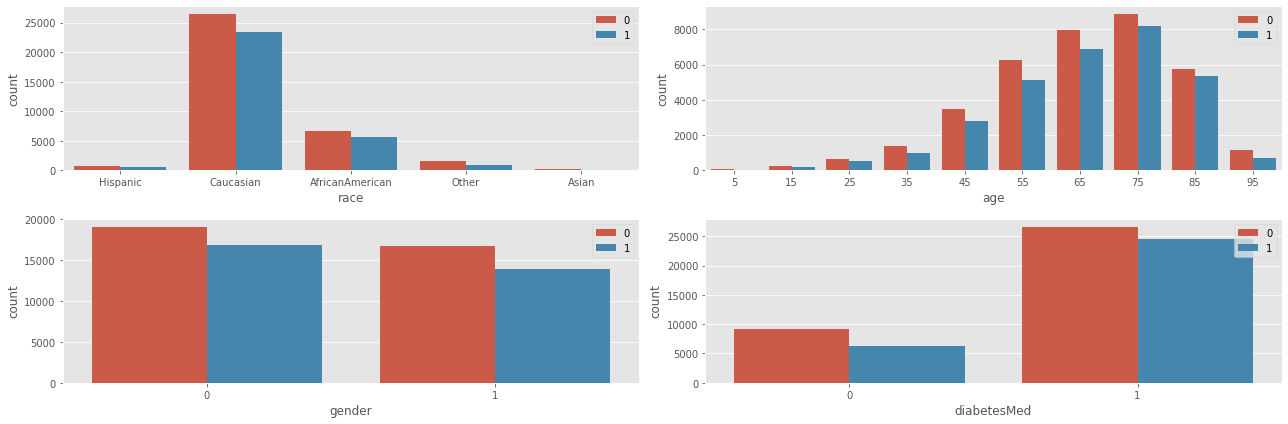

In [89]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='race', hue='readmitted', ax=ax1)
sns.countplot(data=df, x='age', hue='readmitted', ax=ax2)
sns.countplot(data=df, x='gender', hue='readmitted', ax=ax3)
sns.countplot(data=df, x='diabetesMed', hue='readmitted', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [90]:
df = pd.concat([df,pd.get_dummies(df['race'], prefix='race')], axis=1).drop(['race'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 66587 non-null  int64  
 1   encounter_id          66587 non-null  int64  
 2   patient_id            66587 non-null  int64  
 3   gender                66587 non-null  int64  
 4   age                   66587 non-null  int64  
 5   time_in_hospital      66587 non-null  int64  
 6   num_lab_procedures    66587 non-null  int64  
 7   num_procedures        66587 non-null  int64  
 8   num_medications       66587 non-null  int64  
 9   number_outpatient     66587 non-null  int64  
 10  number_emergency      66587 non-null  int64  
 11  number_inpatient      66587 non-null  int64  
 12  diag_1                66587 non-null  float64
 13  diag_2                66587 non-null  float64
 14  diag_3                66587 non-null  float64
 15  diag_5             

Data SPlit

In [123]:
y = df['readmitted']
X = df.drop(['readmitted'], axis=1)

In [92]:
df.head()

,index,encounter_id,patient_id,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,X13,X20,change,diabetesMed,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,69375,197029140,51521940,1,85,4,39,1,9,1,...,2,0,0,1,1,0,0,0,1,0
1,57272,163571946,92631357,1,65,3,34,1,12,0,...,0,0,0,0,0,0,0,1,0,0
2,82347,256497366,30023982,0,55,6,50,2,24,0,...,0,1,1,1,1,0,0,1,0,0
3,89608,289891212,93606021,0,75,5,63,0,14,0,...,0,1,1,1,1,1,0,0,0,0
4,24091,81873900,23464296,1,75,9,17,1,11,0,...,0,0,0,0,1,0,0,1,0,0


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [94]:
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [95]:
#SVM
svm = SVC() 
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_train)


In [96]:
print('\nSVM Initial Performance:')
print('------------------------')
print('F1 Score        : ', metrics.f1_score(y_train, svm_pred,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y_train, svm_pred))


SVM Initial Performance:
------------------------
F1 Score        :  0.6987178283804839
Confusion Matrix:
  [[23183  5576]
 [10473 14037]]


In [97]:
test=pd.read_csv("/content/test-1617360461595-1660719701431.csv")

In [98]:
test.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
0,11128,46325466,3928383,Caucasian,Female,[70-80),?,3,?,45,...,No,No,No,No,No,No,No,No,No,Yes
1,79758,245219616,60926103,Caucasian,Male,[60-70),?,2,?,10,...,No,No,No,No,No,No,No,No,No,Yes
2,52497,155321232,25234848,AfricanAmerican,Male,[70-80),?,11,InternalMedicine,41,...,No,No,Steady,No,No,No,No,No,No,Yes
3,64504,179491944,86935374,Caucasian,Female,[70-80),?,1,InternalMedicine,71,...,No,No,No,No,No,No,No,No,No,No
4,987,7425954,2486826,AfricanAmerican,Female,[50-60),?,7,InternalMedicine,59,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [99]:
features_drop_list = [ 'weight', 'medical_specialty', 'X4', 'X5', 'X6', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X21', 'X22', 'X23', 'X24','X25', 'X8', 'X11']

In [100]:
test.drop(features_drop_list, axis=1,inplace=True)

In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16647 entries, 0 to 16646
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               16647 non-null  int64  
 1   encounter_id        16647 non-null  int64  
 2   patient_id          16647 non-null  int64  
 3   race                16647 non-null  object 
 4   gender              16647 non-null  object 
 5   age                 16647 non-null  object 
 6   time_in_hospital    16647 non-null  int64  
 7   num_lab_procedures  16647 non-null  int64  
 8   num_procedures      16647 non-null  int64  
 9   num_medications     16647 non-null  int64  
 10  number_outpatient   16647 non-null  int64  
 11  number_emergency    16647 non-null  int64  
 12  number_inpatient    16647 non-null  int64  
 13  diag_1              16647 non-null  object 
 14  diag_2              16647 non-null  object 
 15  diag_3              16647 non-null  object 
 16  diag

In [102]:
dl=['diag_4']

In [103]:
test.drop(dl, axis=1,inplace=True)

In [104]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16647 entries, 0 to 16646
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               16647 non-null  int64  
 1   encounter_id        16647 non-null  int64  
 2   patient_id          16647 non-null  int64  
 3   race                16647 non-null  object 
 4   gender              16647 non-null  object 
 5   age                 16647 non-null  object 
 6   time_in_hospital    16647 non-null  int64  
 7   num_lab_procedures  16647 non-null  int64  
 8   num_procedures      16647 non-null  int64  
 9   num_medications     16647 non-null  int64  
 10  number_outpatient   16647 non-null  int64  
 11  number_emergency    16647 non-null  int64  
 12  number_inpatient    16647 non-null  int64  
 13  diag_1              16647 non-null  object 
 14  diag_2              16647 non-null  object 
 15  diag_3              16647 non-null  object 
 16  diag

In [105]:
#start by setting all values containing E or V into 0 (as one category)
test.loc[test['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
test.loc[test['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0
test.loc[test['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
test.loc[test['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0
test.loc[test['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
test.loc[test['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0



#setting all missing values into -1
test['diag_1'] = test['diag_1'].replace('?', -1)
test['diag_2'] = test['diag_2'].replace('?', -1)
test['diag_3'] = test['diag_3'].replace('?', -1)

#No all diag values can be converted into numeric values
test['diag_1'] = test['diag_1'].astype(float)
test['diag_2'] = test['diag_2'].astype(float)
test['diag_3'] = test['diag_3'].astype(float)

In [107]:
#Now we will reduce the number of categories in diag features according to ICD-9 code
#(Missing values will be grouped as E & V values)
test['diag_1'].loc[(test['diag_1']>=1) & (test['diag_1']< 140)] = 1
test['diag_1'].loc[(test['diag_1']>=140) & (test['diag_1']< 240)] = 2
test['diag_1'].loc[(test['diag_1']>=240) & (test['diag_1']< 280)] = 3
test['diag_1'].loc[(test['diag_1']>=280) & (test['diag_1']< 290)] = 4
test['diag_1'].loc[(test['diag_1']>=290) & (test['diag_1']< 320)] = 5
test['diag_1'].loc[(test['diag_1']>=320) & (test['diag_1']< 390)] = 6
test['diag_1'].loc[(test['diag_1']>=390) & (test['diag_1']< 460)] = 7
test['diag_1'].loc[(test['diag_1']>=460) & (test['diag_1']< 520)] = 8
test['diag_1'].loc[(test['diag_1']>=520) & (test['diag_1']< 580)] = 9
test['diag_1'].loc[(test['diag_1']>=580) & (test['diag_1']< 630)] = 10
test['diag_1'].loc[(test['diag_1']>=630) & (test['diag_1']< 680)] = 11
test['diag_1'].loc[(test['diag_1']>=680) & (test['diag_1']< 710)] = 12
test['diag_1'].loc[(test['diag_1']>=710) & (test['diag_1']< 740)] = 13
test['diag_1'].loc[(test['diag_1']>=740) & (test['diag_1']< 760)] = 14
test['diag_1'].loc[(test['diag_1']>=760) & (test['diag_1']< 780)] = 15
test['diag_1'].loc[(test['diag_1']>=780) & (test['diag_1']< 800)] = 16
test['diag_1'].loc[(test['diag_1']>=800) & (test['diag_1']< 1000)] = 17
test['diag_1'].loc[(test['diag_1']==-1)] = 0

test['diag_2'].loc[(test['diag_2']>=1) & (test['diag_2']< 140)] = 1
test['diag_2'].loc[(test['diag_2']>=140) & (test['diag_2']< 240)] = 2
test['diag_2'].loc[(test['diag_2']>=240) & (test['diag_2']< 280)] = 3
test['diag_2'].loc[(test['diag_2']>=280) & (test['diag_2']< 290)] = 4
test['diag_2'].loc[(test['diag_2']>=290) & (test['diag_2']< 320)] = 5
test['diag_2'].loc[(test['diag_2']>=320) & (test['diag_2']< 390)] = 6
test['diag_2'].loc[(test['diag_2']>=390) & (test['diag_2']< 460)] = 7
test['diag_2'].loc[(test['diag_2']>=460) & (test['diag_2']< 520)] = 8
test['diag_2'].loc[(test['diag_2']>=520) & (test['diag_2']< 580)] = 9
test['diag_2'].loc[(test['diag_2']>=580) & (test['diag_2']< 630)] = 10
test['diag_2'].loc[(test['diag_2']>=630) & (test['diag_2']< 680)] = 11
test['diag_2'].loc[(test['diag_2']>=680) & (test['diag_2']< 710)] = 12
test['diag_2'].loc[(test['diag_2']>=710) & (test['diag_2']< 740)] = 13
test['diag_2'].loc[(test['diag_2']>=740) & (test['diag_2']< 760)] = 14
test['diag_2'].loc[(test['diag_2']>=760) & (test['diag_2']< 780)] = 15
test['diag_2'].loc[(test['diag_2']>=780) & (test['diag_2']< 800)] = 16
test['diag_2'].loc[(test['diag_2']>=800) & (test['diag_2']< 1000)] = 17
test['diag_2'].loc[(test['diag_2']==-1)] = 0

test['diag_3'].loc[(test['diag_3']>=1) & (test['diag_3']< 140)] = 1
test['diag_3'].loc[(test['diag_3']>=140) & (test['diag_3']< 240)] = 2
test['diag_3'].loc[(test['diag_3']>=240) & (test['diag_3']< 280)] = 3
test['diag_3'].loc[(test['diag_3']>=280) & (test['diag_3']< 290)] = 4
test['diag_3'].loc[(test['diag_3']>=290) & (test['diag_3']< 320)] = 5
test['diag_3'].loc[(test['diag_3']>=320) & (test['diag_3']< 390)] = 6
test['diag_3'].loc[(test['diag_3']>=390) & (test['diag_3']< 460)] = 7
test['diag_3'].loc[(test['diag_3']>=460) & (test['diag_3']< 520)] = 8
test['diag_3'].loc[(test['diag_3']>=520) & (test['diag_3']< 580)] = 9
test['diag_3'].loc[(test['diag_3']>=580) & (test['diag_3']< 630)] = 10
test['diag_3'].loc[(test['diag_3']>=630) & (test['diag_3']< 680)] = 11
test['diag_3'].loc[(test['diag_3']>=680) & (test['diag_3']< 710)] = 12
test['diag_3'].loc[(test['diag_3']>=710) & (test['diag_3']< 740)] = 13
test['diag_3'].loc[(test['diag_3']>=740) & (test['diag_3']< 760)] = 14
test['diag_3'].loc[(test['diag_3']>=760) & (test['diag_3']< 780)] = 15
test['diag_3'].loc[(test['diag_3']>=780) & (test['diag_3']< 800)] = 16
test['diag_3'].loc[(test['diag_3']>=800) & (test['diag_3']< 1000)] = 17
test['diag_3'].loc[(test['diag_3']==-1)] = 0

test['diag_5'].loc[(test['diag_5']>=1) & (test['diag_5']< 140)] = 1
test['diag_5'].loc[(test['diag_5']>=140) & (test['diag_5']< 240)] = 2
test['diag_5'].loc[(test['diag_5']>=240) & (test['diag_5']< 280)] = 3
test['diag_5'].loc[(test['diag_5']>=280) & (test['diag_5']< 290)] = 4
test['diag_5'].loc[(test['diag_5']>=290) & (test['diag_5']< 320)] = 5
test['diag_5'].loc[(test['diag_5']>=320) & (test['diag_5']< 390)] = 6
test['diag_5'].loc[(test['diag_5']>=390) & (test['diag_5']< 460)] = 7
test['diag_5'].loc[(test['diag_5']>=460) & (test['diag_5']< 520)] = 8
test['diag_5'].loc[(test['diag_5']>=520) & (test['diag_5']< 580)] = 9
test['diag_5'].loc[(test['diag_5']>=580) & (test['diag_5']< 630)] = 10
test['diag_5'].loc[(test['diag_5']>=630) & (test['diag_5']< 680)] = 11
test['diag_5'].loc[(test['diag_5']>=680) & (test['diag_5']< 710)] = 12
test['diag_5'].loc[(test['diag_5']>=710) & (test['diag_5']< 740)] = 13
test['diag_5'].loc[(test['diag_5']>=740) & (test['diag_5']< 760)] = 14
test['diag_5'].loc[(test['diag_5']>=760) & (test['diag_5']< 780)] = 15
test['diag_5'].loc[(test['diag_5']>=780) & (test['diag_5']< 800)] = 16
test['diag_5'].loc[(test['diag_5']>=800) & (test['diag_5']< 1000)] = 17
test['diag_5'].loc[(test['diag_5']==-1)] = 0

In [108]:
#check the results
df.diag_1.unique()

array([16.,  9.,  7.,  5., 10.,  8., 17.,  3., 12.,  2., 14., 13.,  0.,
        1.,  4.,  6., 11.])

In [110]:
test['race'] = test['race'].replace('?', 'Other')

In [112]:
test['gender'] = test['gender'].replace('Unknown/Invalid', 'Female')
test.gender.value_counts()

Female    8901
Male      7746
Name: gender, dtype: int64

In [113]:
test['gender'] = test['gender'].replace('Male', 1)
test['gender'] = test['gender'].replace('Female', 0)
test.gender.value_counts()

0    8901
1    7746
Name: gender, dtype: int64

In [115]:
for i in range(0,10):
    test['age'] =test['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i*10+5)
test['age'].value_counts()

75    4200
65    3726
55    2839
85    2781
45    1628
35     615
95     428
25     289
15     123
5       18
Name: age, dtype: int64

In [116]:
test['X1']=test['X1'].replace("None", 0)
test['X1']=test['X1'].replace("Norm", 1)
test['X1']=test['X1'].replace(">200", 2)
test['X1']=test['X1'].replace(">300", 3)
test.X1.value_counts()

0    15827
1      413
2      213
3      194
Name: X1, dtype: int64

In [117]:
test['X2']=test['X2'].replace("None", 0)
test['X2']=test['X2'].replace("Norm", 1)
test['X2']=test['X2'].replace(">7", 2)
test['X2']=test['X2'].replace(">8", 3)

In [118]:
drug_list = ['X3', 'X7', 'X9', 'X10', 'X12', 'X13', 'X20']
for i in drug_list:
    test[i] = test[i].replace('No', 0)
    test[i] = test[i].replace('Steady', 2)
    test[i] = test[i].replace('Down', 1)
    test[i] = test[i].replace('Up', 3)

In [119]:
test['change']=test['change'].replace('No', 0)
test['change']=test['change'].replace('Ch', 1)
test.change.value_counts()

0    8944
1    7703
Name: change, dtype: int64

In [120]:
test['diabetesMed']=test['diabetesMed'].replace('Yes', 1)
test['diabetesMed']=test['diabetesMed'].replace('No', 0)
test.diabetesMed.value_counts()

1    12854
0     3793
Name: diabetesMed, dtype: int64

In [121]:
test = pd.concat([test,pd.get_dummies(test['race'], prefix='race')], axis=1).drop(['race'],axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16647 entries, 0 to 16646
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 16647 non-null  int64  
 1   encounter_id          16647 non-null  int64  
 2   patient_id            16647 non-null  int64  
 3   gender                16647 non-null  int64  
 4   age                   16647 non-null  int64  
 5   time_in_hospital      16647 non-null  int64  
 6   num_lab_procedures    16647 non-null  int64  
 7   num_procedures        16647 non-null  int64  
 8   num_medications       16647 non-null  int64  
 9   number_outpatient     16647 non-null  int64  
 10  number_emergency      16647 non-null  int64  
 11  number_inpatient      16647 non-null  int64  
 12  diag_1                16647 non-null  float64
 13  diag_2                16647 non-null  float64
 14  diag_3                16647 non-null  float64
 15  diag_5             

In [128]:
new=svm.predict(X_train)

In [129]:
print(X_train[0],new[0])

[-0.41721396 -0.43948405  0.91322291 -0.92261857  1.20273056  0.20053436
 -2.14351706 -0.78125652 -0.98539023 -0.30013441 -0.23053951 -0.50489811
 -0.28315254  0.01571555  0.90855463  0.08359824  0.81701513 -0.21288581
 -0.41068373 -0.48825184 -0.22946022 -0.37190907 -0.33419614 -0.27819847
 -0.25785685 -0.95896671 -0.92376972 -1.82988792 -0.47869849 -0.08062111
  0.57887487 -0.14152558 -0.20000976] 1


In [133]:
for i in range(10000):
	print(X_train[1], new[i])

Streaming output truncated to the last 5000 lines.
 -0.25785685 -0.95896671 -0.92376972 -1.82988792 -0.47869849 -0.08062111
 -1.72748904  7.06586062 -0.20000976] 0
[ 1.35198789  1.30117288 -0.39528591  1.08387153  0.57323417 -0.46869662
 -2.14351706 -0.19488207 -1.47707464 -0.30013441  2.08219287 -0.50489811
 -0.28315254  0.01571555 -0.83490877  0.08359824  0.81701513 -0.21288581
 -0.41068373 -0.48825184 -0.22946022 -0.37190907 -0.33419614 -0.27819847
 -0.25785685 -0.95896671 -0.92376972 -1.82988792 -0.47869849 -0.08062111
 -1.72748904  7.06586062 -0.20000976] 1
[ 1.35198789  1.30117288 -0.39528591  1.08387153  0.57323417 -0.46869662
 -2.14351706 -0.19488207 -1.47707464 -0.30013441  2.08219287 -0.50489811
 -0.28315254  0.01571555 -0.83490877  0.08359824  0.81701513 -0.21288581
 -0.41068373 -0.48825184 -0.22946022 -0.37190907 -0.33419614 -0.27819847
 -0.25785685 -0.95896671 -0.92376972 -1.82988792 -0.47869849 -0.08062111
 -1.72748904  7.06586062 -0.20000976] 1
[ 1.35198789  1.30117288 -